In [1]:
import random 
import matplotlib.pyplot as plt
def load_dataset(dataset): # process the dataset
    new_data = []
    for i in range(len(dataset)):
        ex, attributes = dataset[i].split(" ", 1)
        new_data.append(attributes)
    return new_data

def change_type(dataset): # change string to int
    int_data = list()
    for i in range(len(dataset)):
        Object = []
        for a in range(len(dataset[i])):
                if dataset[i][a] == "1":
                    Object.append(1)
                elif dataset[i][a] == "0":
                    Object.append(0)
        int_data.append(Object)
    return int_data
def process_label(row): # determine if the object is positive or not (numbers of 1 >= 3)
    labels = []
    for i in range(len(row)):
        num = 0
        pos = False
        for a in range(len(row[i])):
            if row[i][a]=="1":
                num = num + 1
            if num >= 3:
                row[i] += "1"
                pos = True
                break
        if pos==False:
            row[i] += "0" # add the labels directly ibto dataset instead of another list
    return 0

def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

def train_weights(train, learning_rate, n_epoch):
    weights = [0.2 for i in range(len(train[-1]))]
    record = False
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction #list indices must be integers or slices, not list
            #print(error)
            sum_error += error**2 # get the abs of -1 1 0
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] + learning_rate * error * row[i]
                #print(weights[i+1])
        
        if sum_error == 0 and record == False:
            print("sss")
            zero_error_epoch = epoch
            record = True
        print('>epoch=%d, learning_rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
        #print(weights[0], weights[1],weights[2] ,weights[3],weights[4], weights[5])

    return weights, zero_error_epoch * len(train) #, example_presentations

def draw_func(learning_rate, example_pres):
    plt.plot(learning_rate, example_pres, 'ro')
    plt.ylabel('Number of example-presentations')
    plt.xlabel('Learning rate')
    plt.axis([0, 1, 0, 300])
    plt.show()
    

In [2]:
filename = 'hw3_dataset.txt'
f = open(filename, "r")
lines = f.readlines()
dataset = list(lines)
new_data = load_dataset(dataset)
#print(new_data)
process_label(new_data)
new_int_data = change_type(new_data)
example_pres = []

In [3]:
weights = []
learning_rate = 0.2
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print(new_int_data)
print("----------Leanring rate: 0.2----------")
print("Example-presentations:%d "% example_presentations)

>epoch=0, learning_rate=0.200, error=7.000
>epoch=1, learning_rate=0.200, error=8.000
>epoch=2, learning_rate=0.200, error=6.000
>epoch=3, learning_rate=0.200, error=9.000
>epoch=4, learning_rate=0.200, error=6.000
>epoch=5, learning_rate=0.200, error=5.000
>epoch=6, learning_rate=0.200, error=2.000
sss
>epoch=7, learning_rate=0.200, error=0.000
>epoch=8, learning_rate=0.200, error=0.000
>epoch=9, learning_rate=0.200, error=0.000
>epoch=10, learning_rate=0.200, error=0.000
>epoch=11, learning_rate=0.200, error=0.000
>epoch=12, learning_rate=0.200, error=0.000
>epoch=13, learning_rate=0.200, error=0.000
>epoch=14, learning_rate=0.200, error=0.000
>epoch=15, learning_rate=0.200, error=0.000
>epoch=16, learning_rate=0.200, error=0.000
>epoch=17, learning_rate=0.200, error=0.000
>epoch=18, learning_rate=0.200, error=0.000
>epoch=19, learning_rate=0.200, error=0.000
[-1.2, 0.6000000000000001, 0.4000000000000001, 0.6000000000000001, 0.2, 0.6000000000000001]
[[1, 1, 0, 0, 1, 1], [0, 0, 0, 0, 

In [4]:
learning_rate = 0.4
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print(new_int_data)
print("----------Leanring rate: 0.4----------")
print("Example-presentations:%d "% example_presentations)

>epoch=0, learning_rate=0.400, error=6.000
>epoch=1, learning_rate=0.400, error=7.000
>epoch=2, learning_rate=0.400, error=9.000
>epoch=3, learning_rate=0.400, error=5.000
>epoch=4, learning_rate=0.400, error=2.000
>epoch=5, learning_rate=0.400, error=2.000
sss
>epoch=6, learning_rate=0.400, error=0.000
>epoch=7, learning_rate=0.400, error=0.000
>epoch=8, learning_rate=0.400, error=0.000
>epoch=9, learning_rate=0.400, error=0.000
>epoch=10, learning_rate=0.400, error=0.000
>epoch=11, learning_rate=0.400, error=0.000
>epoch=12, learning_rate=0.400, error=0.000
>epoch=13, learning_rate=0.400, error=0.000
>epoch=14, learning_rate=0.400, error=0.000
>epoch=15, learning_rate=0.400, error=0.000
>epoch=16, learning_rate=0.400, error=0.000
>epoch=17, learning_rate=0.400, error=0.000
>epoch=18, learning_rate=0.400, error=0.000
>epoch=19, learning_rate=0.400, error=0.000
[-1.7999999999999998, 1.0, 0.6, 1.0, 0.19999999999999996, 1.0]
[[1, 1, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1], [1

In [5]:
weights = []
learning_rate = 0.6
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print("----------Leanring rate: 0.6----------")
print("Example-presentations:%d "% example_presentations)

>epoch=0, learning_rate=0.600, error=6.000
>epoch=1, learning_rate=0.600, error=9.000
>epoch=2, learning_rate=0.600, error=9.000
>epoch=3, learning_rate=0.600, error=4.000
>epoch=4, learning_rate=0.600, error=2.000
>epoch=5, learning_rate=0.600, error=3.000
>epoch=6, learning_rate=0.600, error=2.000
sss
>epoch=7, learning_rate=0.600, error=0.000
>epoch=8, learning_rate=0.600, error=0.000
>epoch=9, learning_rate=0.600, error=0.000
>epoch=10, learning_rate=0.600, error=0.000
>epoch=11, learning_rate=0.600, error=0.000
>epoch=12, learning_rate=0.600, error=0.000
>epoch=13, learning_rate=0.600, error=0.000
>epoch=14, learning_rate=0.600, error=0.000
>epoch=15, learning_rate=0.600, error=0.000
>epoch=16, learning_rate=0.600, error=0.000
>epoch=17, learning_rate=0.600, error=0.000
>epoch=18, learning_rate=0.600, error=0.000
>epoch=19, learning_rate=0.600, error=0.000
[-2.8000000000000003, 1.4, 0.7999999999999999, 1.4, 0.7999999999999999, 1.4]
----------Leanring rate: 0.6----------
Example-pr

In [6]:
weights = []
learning_rate = 0.8
n_epoch = 20
weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print(weights)
print("----------Leanring rate: 0.8----------")
print("Example-presentations:%d "% example_presentations)

>epoch=0, learning_rate=0.800, error=8.000
>epoch=1, learning_rate=0.800, error=9.000
>epoch=2, learning_rate=0.800, error=7.000
>epoch=3, learning_rate=0.800, error=4.000
sss
>epoch=4, learning_rate=0.800, error=0.000
>epoch=5, learning_rate=0.800, error=0.000
>epoch=6, learning_rate=0.800, error=0.000
>epoch=7, learning_rate=0.800, error=0.000
>epoch=8, learning_rate=0.800, error=0.000
>epoch=9, learning_rate=0.800, error=0.000
>epoch=10, learning_rate=0.800, error=0.000
>epoch=11, learning_rate=0.800, error=0.000
>epoch=12, learning_rate=0.800, error=0.000
>epoch=13, learning_rate=0.800, error=0.000
>epoch=14, learning_rate=0.800, error=0.000
>epoch=15, learning_rate=0.800, error=0.000
>epoch=16, learning_rate=0.800, error=0.000
>epoch=17, learning_rate=0.800, error=0.000
>epoch=18, learning_rate=0.800, error=0.000
>epoch=19, learning_rate=0.800, error=0.000
[-3.0, 1.8, 1.0, 1.8, 0.19999999999999996, 1.8]
----------Leanring rate: 0.8----------
Example-presentations:80 


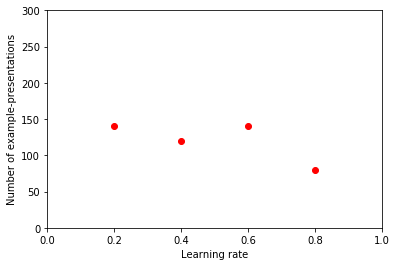

In [7]:
draw_func([0.2, 0.4, 0.6, 0.8], example_pres)